<center>
<img src="../../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #6 (demo)
## <center>  Exploring OLS, Lasso and Random Forest in a regression task
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a6-demo-linear-models-and-rf-for-regression) + [solution](https://www.kaggle.com/kashnitsky/a6-demo-regression-solution).**    
    
<img src='../../img/wine_quality.jpg' width=30%>

**Fill in the missing code and choose answers in [this](https://docs.google.com/forms/d/1aHyK58W6oQmNaqEfvpLTpo6Cb0-ntnvJ18rZcvclkvw/edit) web form.**

In [2]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV, LinearRegression

#This one cannot be called as it is given by default
#from sklearn.metrics.regression import mean_squared_error
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import StandardScaler

**We are working with UCI Wine quality dataset (no need to download it – it's already there, in course repo and in Kaggle Dataset).**

In [3]:
data = pd.read_csv("../../data/winequality-white.csv", sep=";")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Separate the target feature, split data in 7:3 proportion (30% form a holdout set, use random_state=17), and preprocess data with `StandardScaler`.**

In [6]:
# First of all assigning dependent (target) variable and predictors
y = data["quality"]

data_predictors = data.copy()
data_predictors.drop("quality", axis=1, inplace =True)

X = data_predictors

In [7]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [8]:
# Splitting data
X_train, X_holdout, y_train, y_holdout = train_test_split(X, data["quality"], 
                                                          random_state=17, test_size=0.3)

In [9]:
print(X.shape)
print(X_train.shape)
print(X_holdout.shape)
print(X_train.shape[0]/X.shape[0])

# So, yes, 30% is in holdout part

(4898, 11)
(3428, 11)
(1470, 11)
0.6998775010208248


In [10]:
# Using Z-score to normalize data, this time by StandardScaler(), not manually.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

In [11]:
X_train_scaled

array([[-0.99273   ,  0.58375489,  2.64116886, ..., -0.32100149,
         0.10300887, -1.41119853],
       [-0.41141461,  0.38747125, -0.84407222, ..., -0.05551066,
        -0.25313273, -0.51729161],
       [ 0.16990079,  0.28932942,  1.50643921, ..., -0.78561044,
        -0.52023894, -0.11097029],
       ...,
       [-1.22525616, -0.00509605,  0.04750108, ...,  1.33831618,
        -0.87638054,  1.83937207],
       [ 2.72768852, -0.49580516,  0.1285532 , ..., -0.65286502,
        -1.49962834, -0.67982014],
       [-1.10899308,  0.1911876 , -0.27670739, ...,  1.47106159,
        -0.69830974,  1.92063633]])

## Linear regression

**Train a simple linear regression model (Ordinary Least Squares).**

In [12]:
# Fitting simple regression
linreg = LinearRegression()
linreg.fit(X_train, y_train);

**<font color='red'>Question 1:</font> What are mean squared errors of model predictions on train and holdout sets?**

In [13]:
mean_squared_error?

# So it asks for y_real vs. y_predicted.

In [14]:
# Thus calculating both predictions (for train and test data) beforehand:

y_pred_train = linreg.predict(X_train);
y_pred_test = linreg.predict(X_holdout);

In [15]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, y_pred_test))

Mean squared error (train): 0.558
Mean squared error (test): 0.584


Actually, the same result will be achived, when prediction is done with normalized regression and scaled data (as I remember, all key indicators, such as $R^2$ and so on will be the same for normalized regression and ordinary regression based on the same data. Only difference is beta-coefficients).

In [64]:
y_pred_train = linreg_norm.predict(X_train_scaled);
y_pred_test = linreg_norm.predict(X_holdout_scaled);

print("Mean squared error (train): %.3f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, y_pred_test))

Mean squared error (train): 0.558
Mean squared error (test): 0.584


***MSE for train data is 0.558, while for test is 0.584.***

**Sort features by their influence on the target feature (wine quality). Beware that both large positive and large negative coefficients mean large influence on target. It's handy to use `pandas.DataFrame` here.**

**<font color='red'>Question 2:</font> Which feature this linear regression model treats as the most influential on wine quality?**

In [16]:
# To find importance - normalized regression has to be fitted, beta-coefficients will show 
# the impact of predictors on the model:
linreg_norm = LinearRegression()
linreg_norm.fit(X_train_scaled, y_train);


In [17]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [20]:
linreg_coef = pd.DataFrame(
    {"predictor": linreg_norm.coef_,}, index=X_train.columns,)
linreg_coef=linreg_coef.sort_values(by="predictor")

In [34]:
linreg_coef

,predictor
density,-0.665720
volatile acidity,-0.192260
citric acid,-0.000183
chlorides,0.008127
total sulfur dioxide,0.014304
free sulfur dioxide,0.042180
sulphates,0.062053
fixed acidity,0.097822
alcohol,0.129533
pH,0.150036


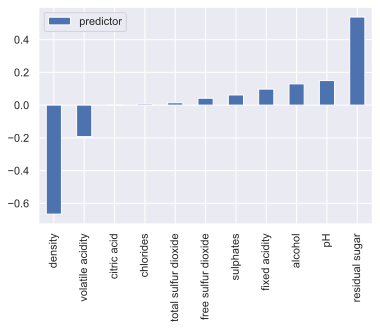

In [26]:
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


linreg_coef.plot.bar();


The signs are not related to the importance (rather it is showing the direction of the relation -direct/inverse), so the importance is judged by absolute values.

Here it is possible to see, that feature density is the most impactful (thus most important), but I'll also make a plot with absolute values.

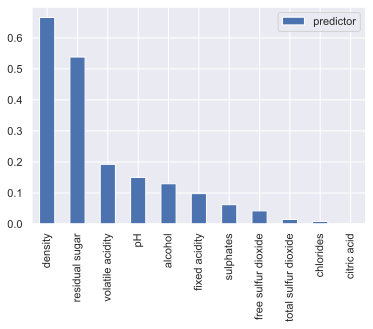

In [33]:
linreg_coef.abs().sort_values(by="predictor", ascending=False).plot.bar();


So, according to the model - the most impactful feature for the wine quality is "density". It is followed by "residual sugar", while the rest of the features have significantly less impact on the model compared to the first two.

## Lasso regression

**Train a LASSO model with $\alpha = 0.01$ (weak regularization) and scaled data. Again, set random_state=17.**

In [36]:
Lasso?

In [37]:
lasso1 = Lasso(alpha=0.01, random_state=17)
lasso1.fit(X_train_scaled, y_train);

**Which feature is the least informative in predicting wine quality, according to this LASSO model?**

In [38]:
lasso1_coef = pd.DataFrame(
    {"predictor": lasso1.coef_,}, index=X_train.columns,)
lasso1_coef=lasso1_coef.sort_values(by="predictor")

In [39]:
lasso1_coef

,predictor
density,-0.235492
volatile acidity,-0.188479
chlorides,-0.002747
fixed acidity,-0.000000
citric acid,-0.000000
total sulfur dioxide,-0.000000
sulphates,0.029722
free sulfur dioxide,0.043088
pH,0.067277
residual sugar,0.256363


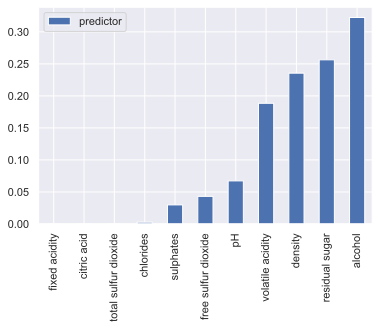

In [41]:
lasso1_coef.abs().sort_values(by="predictor", ascending=True).plot.bar();


***Less informative features are those, whose beta-coefficients in normalized regression (herein using Lasso) are tending to 0. In this dataset there are 3 such features: "fixed acidity", "citric acid", "total sulfur dioxid". Basically, such features usually can be dropped and the accuracy of the model should not change (significantly).***

**Train LassoCV with random_state=17 to choose the best value of $\alpha$ in 5-fold cross-validation.**

In [47]:
LassoCV?

In [48]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas, random_state=17, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        cv=5, random_state=17)

In [49]:
lasso_cv.alpha_

0.0002833096101839324

**<font color='red'>Question 3:</font> Which feature is the least informative in predicting wine quality, according to the tuned LASSO model?**

In [50]:
lasso_cv_coef = pd.DataFrame({"predictor": lasso_cv.coef_,}, index=X_train.columns,)
lasso_cv_coef=lasso_cv_coef.sort_values(by="predictor")

In [51]:
lasso_cv_coef

,predictor
density,-0.648161
volatile acidity,-0.192049
citric acid,-0.000000
chlorides,0.006933
total sulfur dioxide,0.012969
free sulfur dioxide,0.042698
sulphates,0.060939
fixed acidity,0.093295
alcohol,0.137115
pH,0.146549


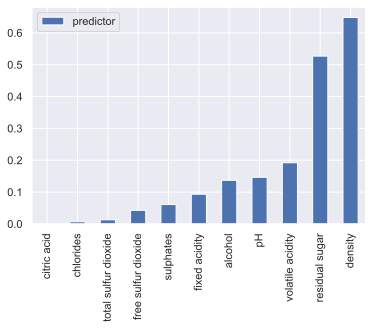

In [52]:
lasso_cv_coef.abs().sort_values(by="predictor", ascending=True).plot.bar();


"Citric acid" is the least impactful feature in the model by tuned Lasso. Once again, presumably, it could be dropped without experiencing (huge) drop in accuracy.

**<font color='red'>Question 4:</font> What are mean squared errors of tuned LASSO predictions on train and holdout sets?**

In [59]:
y_pred_tuned_lasso_train = lasso_cv.predict(X_train_scaled);
y_pred_tuned_lasso_test = lasso_cv.predict(X_holdout_scaled);

In [60]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, y_pred_tuned_lasso_train))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, y_pred_tuned_lasso_test))

Mean squared error (train): 0.558
Mean squared error (test): 0.583


***MSE for train data is 0.558, while for test is 0.583. Tuned Lasso has slightly smaller MSE (by 0.001) for holdout part of the data.***

## Random Forest

**Train a Random Forest with out-of-the-box parameters, setting only random_state to be 17.**

In [62]:
# So pure Random Forest
forest = RandomForestRegressor(random_state=17)
forest.fit(X_train_scaled, y_train);

**<font color='red'>Question 5:</font> What are mean squared errors of RF model on the training set, in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on holdout set?**

In [70]:
y_forest_pred_sc_tr = forest.predict(X_train_scaled)
y_forest_pred_sc_te = forest.predict(X_holdout_scaled)

In [73]:
cvs = cross_val_score(forest, X_train_scaled, y_train, scoring="neg_mean_squared_error")
cvs_mean_abs = 0

for i in cvs:
    cvs_mean_abs += abs(i)
    
cvs_mean_abs /= 5 

In [75]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, y_forest_pred_sc_tr))
print("Mean squared error (cv): %.3f" % cvs_mean_abs)
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, y_forest_pred_sc_te))

Mean squared error (train): 0.053
Mean squared error (cv): 0.414
Mean squared error (test): 0.372


**Tune the `max_features` and `max_depth` hyperparameters with GridSearchCV and again check mean cross-validation MSE and MSE on holdout set.**

In [76]:
forest1 = RandomForestRegressor(random_state=17, n_jobs=-1)

In [77]:
forest_params = {'max_depth': list(range(10, 25)),
                  'min_samples_leaf': list(range(1, 8)),
                  'max_features': list(range(6,12))}

locally_best_forest = GridSearchCV(forest1, forest_params, scoring="neg_mean_squared_error",
    n_jobs=-1, cv=5)
locally_best_forest.fit(X_train_scaled, y_train);

In [78]:
locally_best_forest.best_params_, locally_best_forest.best_score_

({'max_depth': 21, 'max_features': 6, 'min_samples_leaf': 1},
 -0.39773288191505934)

**<font color='red'>Question 6:</font> What are mean squared errors of tuned RF model in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on holdout set?**

In [84]:
y_lbs_sc_holdout_pred = locally_best_forest.predict(X_holdout_scaled)

In [79]:
cvs_1 = cross_val_score(locally_best_forest.best_estimator_, X_train_scaled, y_train,
        scoring="neg_mean_squared_error")

In [81]:
cvs_mean_abs_1 = 0
for i in cvs_1:
    cvs_mean_abs_1 += abs(i)
    
cvs_mean_abs_1 /= 5 

In [88]:
print("Mean squared error (cv): %.3f" % cvs_mean_abs_1)
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, y_lbs_sc_holdout_pred))

Mean squared error (cv): 0.398
Mean squared error (test): 0.366


**Output RF's feature importance. Again, it's nice to present it as a DataFrame.**<br>
**<font color='red'>Question 7:</font> What is the most important feature, according to the Random Forest model?**

In [90]:
importances = locally_best_forest.best_estimator_.feature_importances_

In [110]:
rf_importance = pd.DataFrame(importances, columns=["Predictor"], index=X_train.columns)
rf_importance = rf_importance.sort_values(by="Predictor", ascending = False)

In [111]:
rf_importance

,Predictor
alcohol,0.206056
volatile acidity,0.117578
free sulfur dioxide,0.111556
density,0.088549
pH,0.073659
total sulfur dioxide,0.073640
chlorides,0.073366
residual sugar,0.072072
citric acid,0.062601
fixed acidity,0.061813


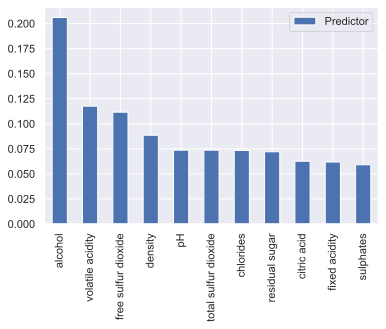

In [112]:
rf_importance.plot.bar();

The most impactful feature using Random Forest is an "alcohol". Also, there is no features with 0.000000 importance anymore, which also is a good sign.

**Make conclusions about the performance of the explored 3 models in this particular prediction task.**

***Herein for comparing the models was used MSE. According to it - the better model will have lower MSE.***

Comparison of the models is showing that:
- Linear Regression MSE for train data is 0.558, for test is 0.584.
- Lasso MSE for train data is 0.558, for test is 0.583.
- Pure Random Forest MSE for train data is 0.053, CV is 0.414, for test is 0.372.
- Tuned Random Forest MSE for CV is 0.398, for test is 0.366.

The last model has the lowest values of MSE of all created models. Also, Tuned Random Forest approach has all of the features having some impact, while in linear models some features were impactless (or had an impact at a very small degree, such that they can easily be neglected). It is showing, that relation between target feature and predictors is not linear, thus RF is a better choice in this situation.